In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from CrossValidation import *
from sklearn.metrics import roc_curve, auc

Passed 1
Passed 2


In [2]:
random_state = 0

In [3]:
def confusion_matrix(preds, labels, classes):
    label_reindex = classes
    n = len(label_reindex)
    mat = np.zeros([n,n])
    for pred, label in zip(preds, labels):
        l_index = label_reindex.index(label)
        p_index = label_reindex.index(pred)
        mat[l_index, p_index] = mat[l_index, p_index] + 1
    return mat

# Load data

In [4]:
train_directory = 'Cleaned/train_numerical.csv'
test_directory = 'Cleaned/validation_numerical.csv'

In [5]:
train_data = pd.read_csv(train_directory)
test_data = pd.read_csv(test_directory)

In [6]:
train = train_data[['Weekday', 'ScanCount', 'DepartmentDescription']].values
train_label = train_data.TripType.values
test = test_data[['Weekday', 'ScanCount', 'DepartmentDescription']].values
test_label = test_data.TripType.values
n_classes = np.unique(test_label)
del train_data
del test_data

In [7]:
print(train.shape)
print(test.shape)

(5142, 3)
(1287, 3)


In [8]:
cv_train = np.vstack([train,test])
cv_label = np.hstack([train_label, test_label])

# Baseline Training

In [9]:
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=random_state))

In [8]:
y_score = classifier.fit(train, train_label).decision_function(test)

In [12]:
pred = classifier.predict(test)

In [13]:
confusion_mat = confusion_matrix(pred, test_label, np.unique(train_label).tolist())

In [14]:
confusion = pd.DataFrame(confusion_mat)
confusion.columns = np.unique(train_label)

In [15]:
confusion

,3,4,5,6,7,8,9,15,18,19,...,36,37,38,39,40,41,42,43,44,999
0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
2,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0
3,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0
4,2.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,8.0,0.0,0.0,13.0,0.0,0.0
5,10.0,0.0,0.0,0.0,33.0,2.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,5.0,5.0,0.0,0.0,41.0,0.0,0.0
6,7.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,...,3.0,3.0,0.0,2.0,2.0,1.0,3.0,12.0,0.0,0.0
7,2.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
lb = LabelBinarizer()
new_test_label = lb.fit(train_label).transform(test_label)
fpr, tpr, _ = roc_curve(new_test_label.ravel(), y_score.ravel())

In [19]:
roc_auc = auc(fpr, tpr)

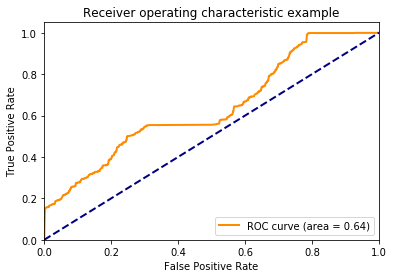

In [20]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [11]:
# result, prob = cross_validate(classifier, cv_train, cv_label)